In [71]:
import pandas as pd
import numpy as np


In [72]:
data=pd.read_csv("insurance.csv")
df=pd.DataFrame(data)

In [73]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [74]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


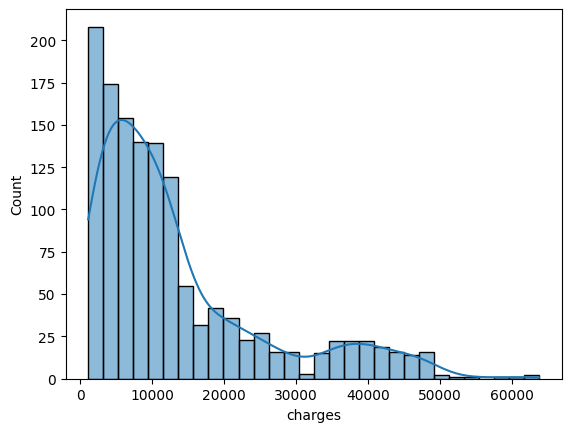

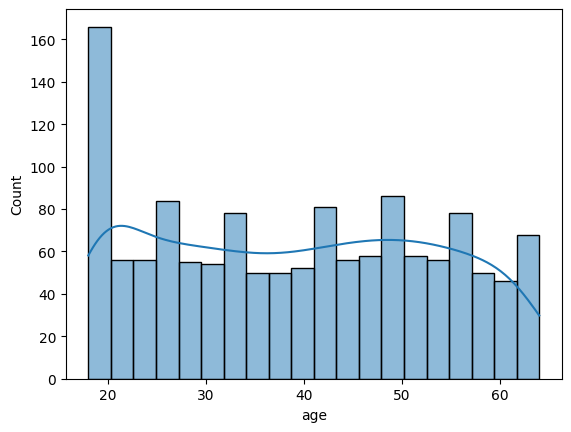

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of charges
sns.histplot(df['charges'], bins=30, kde=True)
plt.show()

# Histogram of age
sns.histplot(df['age'], bins=20, kde=True)
plt.show()


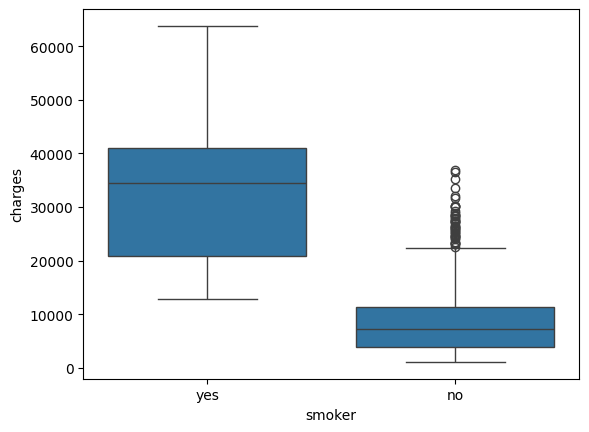

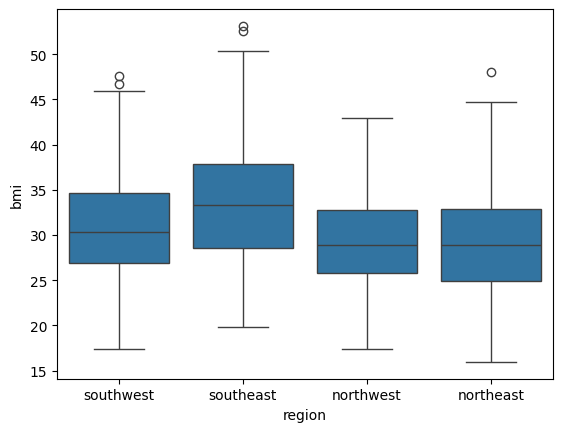

In [76]:
# Charges by smoker status
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

# BMI by region
sns.boxplot(x='region', y='bmi', data=df)
plt.show()

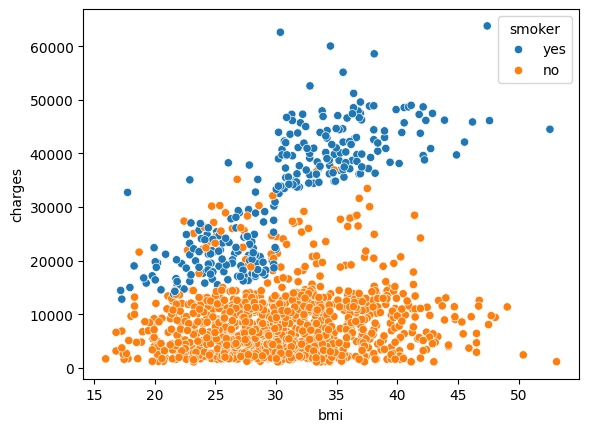

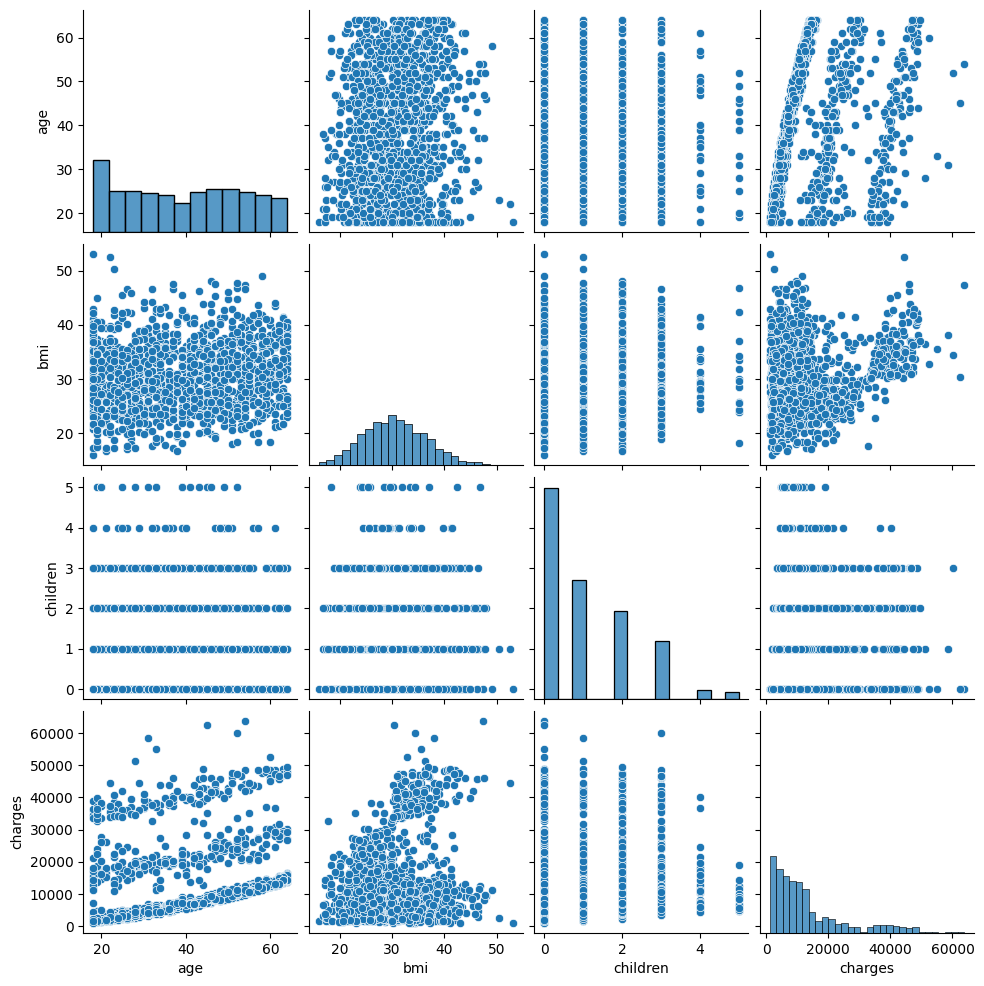

In [77]:
# Scatter plot: BMI vs Charges
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.show()

# Pairplot for numerical columns
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], kind='scatter')
plt.show()

In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
list=['sex','smoker']
df[list]=df[list].astype('category')


In [ ]:
df['Is_smoker']=df['smoker'].cat.codes
df['Is_male']=df['sex'].cat.codes

In [ ]:
df=pd.get_dummies(df , columns=['region'] ,drop_first=True , prefix='Is', prefix_sep='_')

In [ ]:
list=['Is_northwest'	,'Is_southeast'	,'Is_southwest']
df[list]= df[list].astype('int')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to normalize
cols = ['age', 'bmi', 'children']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the columns
df[cols] = scaler.fit_transform(df[cols])

In [ ]:
df['charges']=df['charges'].round(2)

In [ ]:
df.drop( columns=['sex','smoker'])

,age,bmi,children,charges,Is_smoker,Is_male,Is_northwest,Is_southeast,Is_southwest
0,-1.438764,-0.453320,-0.908614,16884.92,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55,0,1,0,1,0
2,-0.797954,0.383307,1.580926,4449.46,0,1,0,1,0
3,-0.441948,-1.305531,-0.908614,21984.47,0,1,1,0,0
4,-0.513149,-0.292556,-0.908614,3866.86,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,10600.55,0,1,1,0,0
1334,-1.509965,0.206139,-0.908614,2205.98,0,0,0,0,0
1335,-1.509965,1.014878,-0.908614,1629.83,0,0,0,1,0
1336,-1.296362,-0.797813,-0.908614,2007.94,0,0,0,0,1


In [ ]:
df.to_csv('ready.csv', index=False)


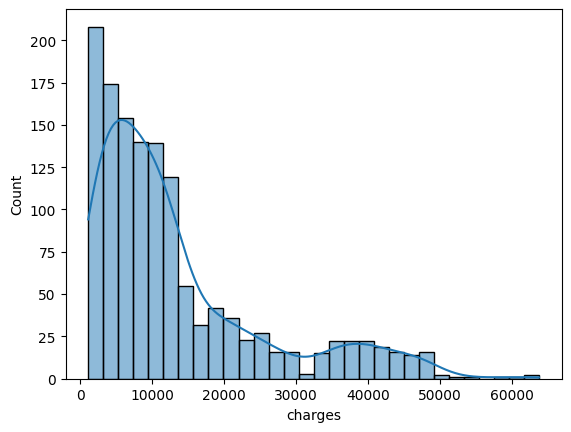

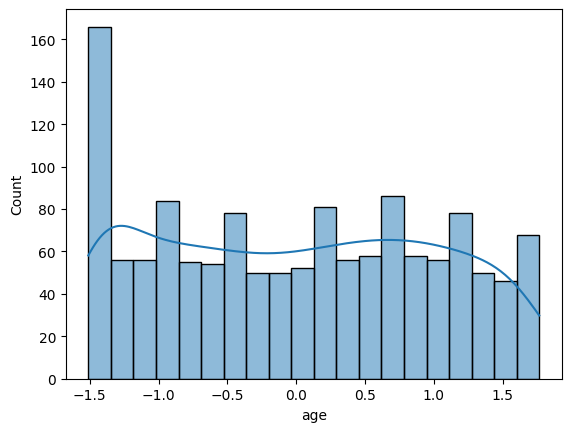

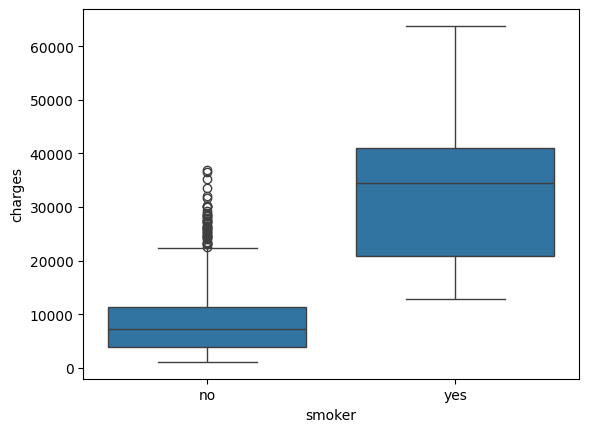

ValueError: Could not interpret value `region` for `x`. An entry with this name does not appear in `data`.